In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


8.800000000000086
33.65


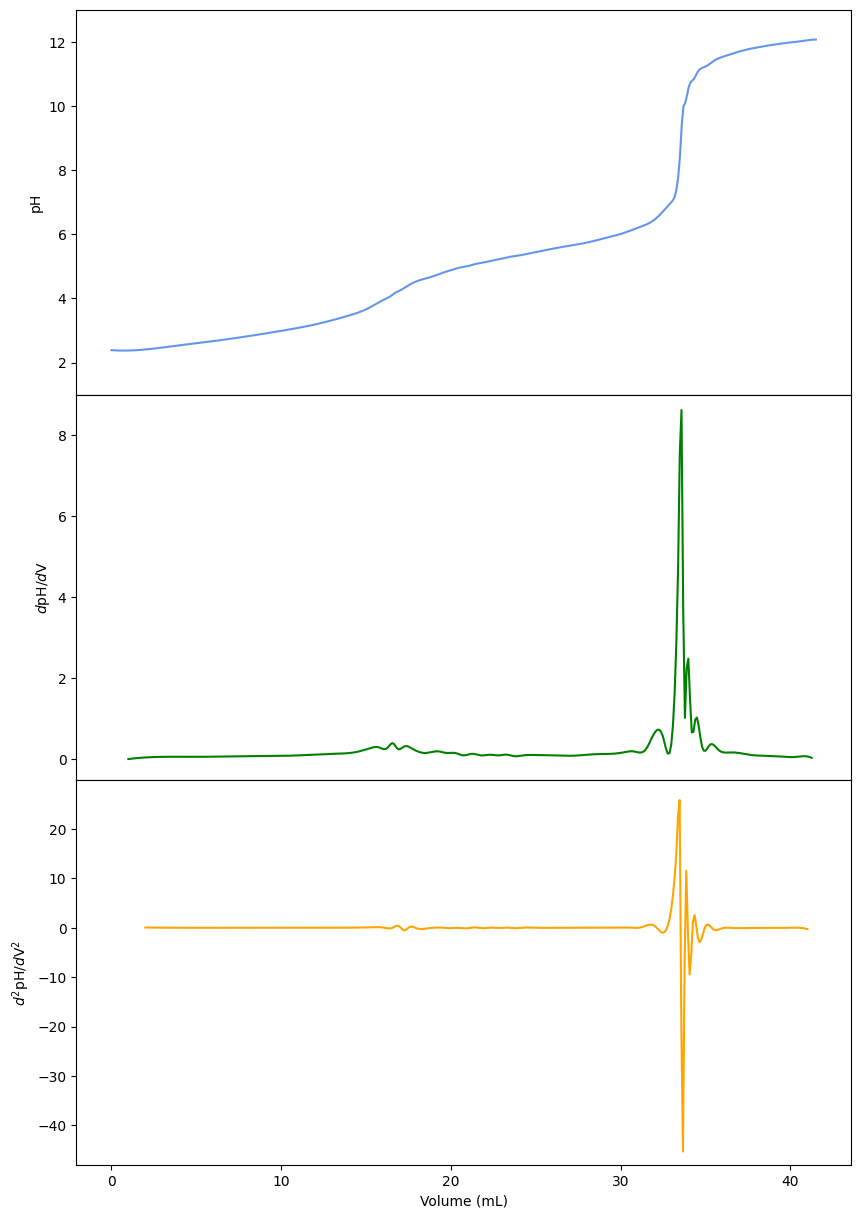

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#adding to "smooth data"
from scipy.interpolate import make_interp_spline, BSpline

#establishes dimensions and relative locations of subplots (in this case, 3 rows, one column)
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.subplots_adjust(hspace=0)

#experimental data
data = np.array([
    [0.00, 2.39],
    [2.00, 2.41],
    [4.00, 2.54],
    [6.00, 2.67],
    [8.00, 2.82],
    [10.00, 2.99],
    [12.00, 3.19],
    [14.00, 3.47],
    [15.00, 3.66],
    [15.50, 3.80],
    [16.00, 3.95],
    [16.50, 4.09],
    [16.70, 4.17],
    [17.00, 4.25],
    [17.50, 4.41],
    [18.00, 4.54],
    [19.00, 4.70],
    [19.50, 4.80],
    [20.00, 4.88],
    [20.50, 4.96],
    [21.00, 5.01],
    [21.50, 5.08],
    [22.00, 5.13],
    [22.60, 5.20],
    [23.00, 5.24],
    [23.50, 5.30],
    [24.00, 5.34],
    [24.50, 5.39],
    [25.50, 5.50],
    [26.50, 5.60],
    [28.00, 5.74],
    [29.00, 5.87],
    [30.00, 6.01],
    [30.50, 6.10],
    [31.00, 6.20],
    [32.00, 6.46],
    [33.00, 7.01],
    [33.25, 7.30],
    [33.40, 7.84],
    [33.50, 8.49],
    [33.65, 9.81],
    [33.80, 10.09],
    [34.00, 10.57],
    [34.30, 10.83],
    [34.50, 11.03],
    [35.00, 11.23],
    [35.50, 11.41],
    [36.00, 11.53],
    [36.70, 11.65],
    [37.00, 11.70],
    [38.00, 11.82],
    [39.00, 11.91],
    [40.00, 11.98],
    [40.50, 12.01],
    [41.00, 12.05],
    [41.50, 12.07]
])

# Extract the first column into a separate array
v = data[:, 0]

# Extract the second column into a separate array
pH = data[:, 1]

#smoothed data for experimental data
vnew = np.linspace(v.min(), v.max(), 400) 
#define spline
spl = make_interp_spline(v, pH, k=3)
pH_smooth = spl(vnew)

#first derivative
dv = np.array([(v[i+1] + v[i])/2 for i in range(len(v)-1)])
dpH = np.array([(pH[i+1]-pH[i])/(v[i+1]-v[i]) for i in range (len(v)-1)])

#smoothed data for 1st derivative
dvnew = np.linspace(dv.min(), dv.max(), 400) 
#define spline
dspl = make_interp_spline(dv, dpH, k=3)
dpH_smooth = dspl(dvnew)


#second derivative
ddv = np.array([(dv[i+1] + dv[i])/2 for i in range(len(dv)-1)])
ddpH = np.array([(dpH[i+1]-dpH[i])/(dv[i+1]-dv[i]) for i in range (len(dv)-1)])

#smoothed data for 1st derivative
ddvnew = np.linspace(ddv.min(), ddv.max(), 400) 
#define spline
ddspl = make_interp_spline(ddv, ddpH, k=3)
ddpH_smooth = ddspl(dvnew)

#finding the equivalence point
max_val = dpH.max()
max_val_index = np.argmax(dpH)
#volume where the maximum dpH value is located
corresponding_v = ddv[max_val_index]

print(max_val)
print(corresponding_v)

#graph of titration alone
ax1.plot(vnew, pH_smooth, color='cornflowerblue')
#ax1.set_xlim(0, 55)
ax1.set_ylim(1,13)
ax1.set_yticks(np.arange(2,14,2))
ax1.set_ylabel('pH')
ax1.grid(False)

#plotting equivalence point on normal titration
#ax1.plot(16.5, 6, 'ko', markersize=4)
#ax1.plot(8.25, 2.59, 'kx', markersize=4)
#ax1.plot(24.75, 9.75, 'kx', markersize=4)

#graph of 1st derivative of titration 
ax2.plot(dvnew, dpH_smooth, color='green')
#ax2.set_xlim(0, 55)
ax2.set_ylim(-0.5,9)
ax2.set_yticks(np.arange(0,9,2))
ax2.set_ylabel('$d$pH/$d$V')
ax2.grid(False)

#plotting equivalence point on the 1st derivative graph
#ax2.plot(16.4, 3.94, 'ko', markersize=4)
#ax2.plot(8.25, 0.1, 'kx', markersize=4)
#ax2.plot(24.75, 0.105, 'kx', markersize=4)

#graph of 2nd derivative of titration 
ax3.plot(ddvnew, ddpH_smooth, color='orange')
#ax3.set_xlim(0, 55)
ax3.set_ylim(-48,30)
ax3.set_yticks(np.arange(-40,30,10))
ax3.set_xlabel('Volume (mL)')
ax3.set_ylabel('$d^2$pH/$d\mathrm{V}^2$')
ax3.grid(False)

#plotting equivalence point on the 2nd derivative graph (16.7 value = from corresponding_value)
#ax3.plot(16.7, 0, 'ko', markersize=4)
#ax3.plot(8.25, 0.03, 'kx', markersize=4)
#ax3.plot(24.75, 0.08, 'kx', markersize=4)
